<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

# Introduction to Convolutions
Convolutions are a fundamental operation in many machine learning and signal processing applications. This chapter explores various types of convolutions used in deep learning.

[convolution](https://viso.ai/deep-learning/convolution-operations/)

# Types of Convolutions (Classified)

### 1. **Standard and Dimensional Convolutions**
These are the fundamental convolution types that operate across different dimensions of data.

| **Convolution Type**        | **Mathematical Description**                                                                                                   | **Explanation**                                                                                                             | **Use Cases**                                                                                              |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **1D Convolution**           | $y(i) = \sum_{m} x(i+m) \cdot k(m)$                                                                                          | Operates on one-dimensional data by sliding a kernel along a single axis.                                                  | Time-series analysis, audio processing, and NLP tasks like text classification.                           |
| **2D Convolution**           | $y(i, j) = \sum_{m}\sum_{n} x(i+m, j+n) \cdot k(m, n)$                                                                        | Operates on two-dimensional data (e.g., images) to extract spatial patterns.                                               | Image processing and computer vision tasks, including segmentation and style transfer.                     |
| **3D Convolution**           | $y(i, j, k) = \sum_{m}\sum_{n}\sum_{p} x(i+m, j+n, k+p) \cdot k(m, n, p)$                                                     | Operates on three-dimensional data (e.g., volumetric data) to capture spatiotemporal features.                              | Video analysis, 3D object detection, and medical imaging (e.g., CT or MRI scans).                         |

---



### 2. **Efficient Convolutions**
These types of convolutions are designed to reduce computational cost while maintaining performance.

| **Convolution Type**        | **Mathematical Description**                                                                                                   | **Explanation**                                                                                                             | **Use Cases**                                                                                              |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **Separable Convolution**    | $y(i, j) = \sum_{c} \big(\sum_{m}\sum_{n} x_c(i+m, j+n) \cdot k_d(m, n)\big) \cdot k_p(c)$                                     | Decomposes a standard convolution into depthwise and pointwise convolutions for efficiency.                                 | Lightweight architectures (e.g., MobileNet) and real-time applications.                                    |
| **Depthwise Convolution**    | $y_c(i, j) = \sum_{m}\sum_{n} x_c(i+m, j+n) \cdot k_c(m, n)$                                                                  | Applies a single kernel to each input channel independently, reducing computations significantly.                           | Efficient feature extraction in resource-constrained environments.                                         |
| **Pointwise Convolution**    | $y(i, j, c') = \sum_{c} x(i, j, c) \cdot k(c, c')$                                                                            | Uses a $1 \times 1$ kernel to combine information across channels.                                                          | Channel mixing in separable convolutions and bottleneck layers.                                            |
| **Grouped Convolution**      | $y(i, j, g) = \sum_{m}\sum_{n} x_g(i+m, j+n) \cdot k_g(m, n)$                                                                 | Splits the input channels into groups and applies independent convolutions within each group.                               | Efficient model architectures (e.g., ResNeXt, ShuffleNet) with reduced parameters and computation.         |

---


### 3. **Receptive Field Enhancements**
These convolutions modify the receptive field to capture more contextual or larger-scale features.

| **Convolution Type**        | **Mathematical Description**                                                                                                   | **Explanation**                                                                                                             | **Use Cases**                                                                                              |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **Dilated (Atrous) Convolution** | $y(i, j) = \sum_{m}\sum_{n} x(i+r \cdot m, j+r \cdot n) \cdot k(m, n)$                                                     | Expands the kernel by inserting zeros between elements, increasing the receptive field without additional parameters.       | Semantic segmentation, wave generation, and audio synthesis.                                               |



### 4. **Upsampling Convolutions**
These types of convolutions are used to increase the spatial resolution of the input data.

| **Convolution Type**        | **Mathematical Description**                                                                                                   | **Explanation**                                                                                                             | **Use Cases**                                                                                              |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **Transposed (Deconvolution)** | $y(i, j) = \sum_{m}\sum_{n} x(i-m, j-n) \cdot k(m, n)$                                                                       | Increases spatial resolution (upsampling) by reversing the convolution process.                                             | Image generation (GANs), semantic segmentation, and super-resolution tasks.                               |



### 5. **Boundary and Special-Purpose Convolutions**
These convolutions handle unique boundary conditions or work in specialized domains like graphs and Fourier transforms.

| **Convolution Type**        | **Mathematical Description**                                                                                                   | **Explanation**                                                                                                             | **Use Cases**                                                                                              |
|-----------------------------|-------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **Strided Convolution**      | $y(i, j) = \sum_{m}\sum_{n} x(i \cdot s + m, j \cdot s + n) \cdot k(m, n)$                                                    | Performs convolution while skipping spatial locations (stride $s > 1$), reducing the resolution.                            | Downsampling in convolutional layers, often replacing pooling operations.                                  |
| **Circular Convolution**     | $y(i, j) = \sum_{m}\sum_{n} x((i+m) \mod H, (j+n) \mod W) \cdot k(m, n)$                                                      | Assumes periodic boundaries (wrapping edges) during convolution, useful for certain types of data.                          | Signal processing and tasks involving periodic or cyclic data.                                             |
| **Edge Convolution**         | $y(p_i) = \sum_{p_j \in \mathcal{N}(p_i)} \phi(x(p_i), x(p_j))$                                                               | Computes features based on relationships between a point and its neighbors, often in graph-based data.                      | Point cloud processing, 3D object detection, and graph neural networks.                                    |
| **Fourier Convolution**      | $y = \mathcal{F}^{-1}(\mathcal{F}(x) \cdot \mathcal{F}(k))$                                                                   | Performs convolution in the frequency domain by multiplying Fourier transforms of the input and kernel, then transforming back. | Frequency-domain analysis, signal processing, and spectral image processing.                               |

---

### How to Use:
- Copy this Markdown content into a Markdown cell in your Jupyter Notebook.
- Run the cell to render the formatted and categorized table.
- This categorization helps in understanding the roles and purposes of different convolution types.

Let me know if additional details are required!


Output shape: torch.Size([1, 32, 26, 26])


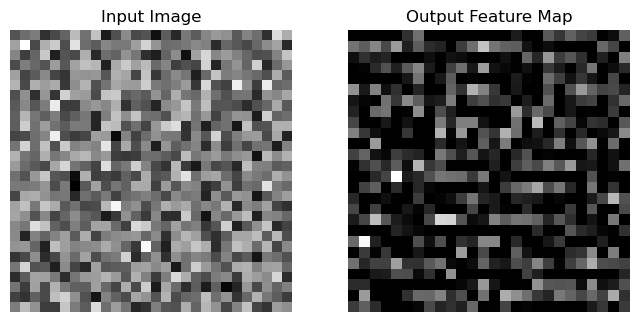

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt  # added for image display

# Example of a 2D convolution using PyTorch
input_data = torch.randn(1, 1, 28, 28)
conv_layer = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
activation = nn.ReLU()
output = activation(conv_layer(input_data))
print('Output shape:', output.shape)

# Display input and output images
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Input Image')
plt.imshow(input_data[0,0].cpu().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Output Feature Map')
plt.imshow(output[0,0].cpu().detach().numpy(), cmap='gray')
plt.axis('off')

plt.show()


## Summary
This chapter provided an overview of various convolution types and their applications in deep learning. Understanding these convolution operations is crucial for designing effective neural network architectures.